In [2]:
import csv
def split_csv(input_file, even_output_file, odd_output_file):
    with open(input_file, 'r') as infile, \
         open(even_output_file, 'w', newline='') as even_outfile, \
         open(odd_output_file, 'w', newline='') as odd_outfile:

        reader = csv.reader(infile)
        even_writer = csv.writer(even_outfile)
        odd_writer = csv.writer(odd_outfile)

        # Read the first row and write it to both output files
        first_row = next(reader)
        even_writer.writerow(first_row)
        odd_writer.writerow(first_row)

        for index, row in enumerate(reader):
            if index % 2 == 0:
                even_writer.writerow(row)
            else:
                odd_writer.writerow(row)

# Example usage:

models = ['llama', 'falcon','gemma_2b','mistral']
even_output_file = 'train.csv'
odd_output_file = 'val.csv'

for model in models:
  split_csv(f'/content/pretraining_history_{model}.csv', f'train_{model}.csv', f'val_{model}.csv')

In [3]:
import csv

def filter_columns(input_file, output_file):
    with open(input_file, 'r') as infile, \
         open(output_file, 'w', newline='') as outfile:

        reader = csv.reader(infile)
        writer = csv.writer(outfile)

        # Read the header row
        header = next(reader)

        # Find the index of 'step' and 'loss' columns
        step_index = header.index('step')
        loss_index = header.index('loss')

        # Write the header with 'step' and 'loss' columns
        writer.writerow(['step', 'loss'])
        reader = list(reader)[:-1]
        # Iterate through the rows, keeping only 'step' and 'loss' columns
        for row in reader:
            filtered_row = [row[step_index], row[loss_index]]
            writer.writerow(filtered_row)


models = ['llama', 'falcon','gemma_2b','mistral']

for model in models:
  filter_columns(f'train_{model}.csv', f'train_filt_{model}.csv')

In [4]:
import csv

def filter_columns(input_file, output_file):
    with open(input_file, 'r') as infile, \
         open(output_file, 'w', newline='') as outfile:

        reader = csv.reader(infile)
        writer = csv.writer(outfile)

        # Read the header row
        header = next(reader)

        # Find the index of 'step' and 'loss' columns
        step_index = header.index('step')
        loss_index = header.index('eval_loss')

        # Write the header with 'step' and 'loss' columns
        writer.writerow(['step', 'eval_loss'])

        # Iterate through the rows, keeping only 'step' and 'loss' columns
        for row in reader:
            filtered_row = [row[step_index], row[loss_index]]
            writer.writerow(filtered_row)



models = ['llama', 'falcon','gemma_2b','mistral']

for model in models:
  filter_columns(f'val_{model}.csv', f'val_filt_{model}.csv')

In [5]:
import csv

def merge_csv(step_loss_file, step_eval_loss_file, output_file):
    with open(step_loss_file, 'r') as file1, open(step_eval_loss_file, 'r') as file2, \
         open(output_file, 'w', newline='') as outfile:

        reader1 = csv.reader(file1)
        reader2 = csv.reader(file2)
        writer = csv.writer(outfile)

        # Skip header rows
        next(reader1)
        next(reader2)

        # Write header to output file
        writer.writerow(['step', 'loss', 'eval_loss'])

        # Merge corresponding rows from both files
        for row1, row2 in zip(reader1, reader2):
            merged_row = [row1[0], row1[1], row2[1]]  # Assuming step is the first column in both files
            writer.writerow(merged_row)

for model in models:
    step_loss_file = f'train_filt_{model}.csv'  # Replace with your file containing step and loss data
    step_eval_loss_file = f'val_filt_{model}.csv'  # Replace with your file containing step and eval_loss data
    output_file = f'{model}_data.csv'  # Output file to store the merged data

    merge_csv(step_loss_file, step_eval_loss_file, output_file)


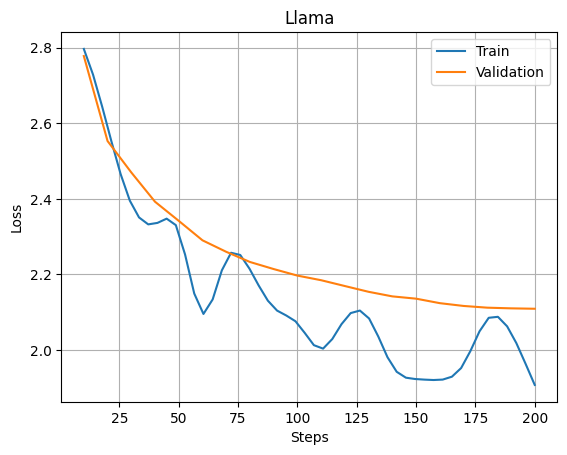

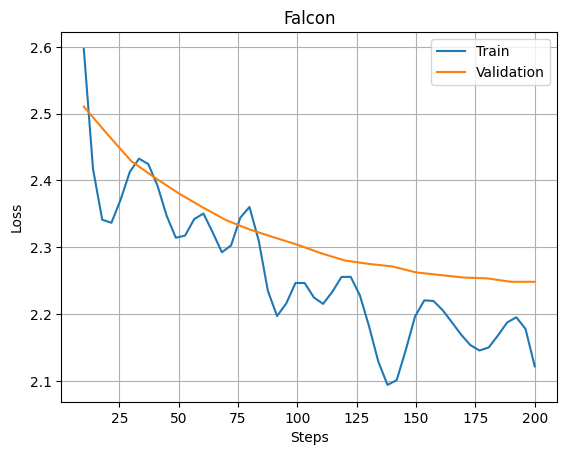

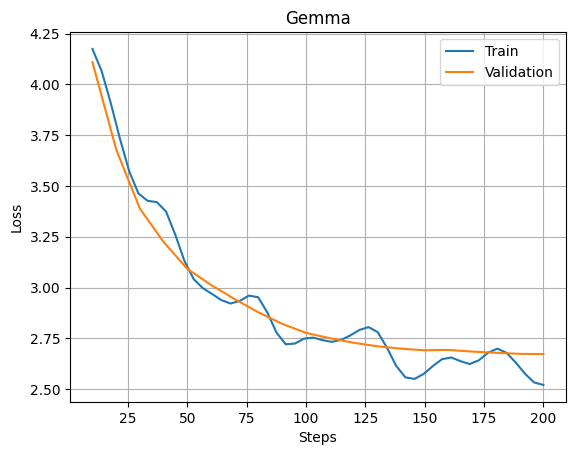

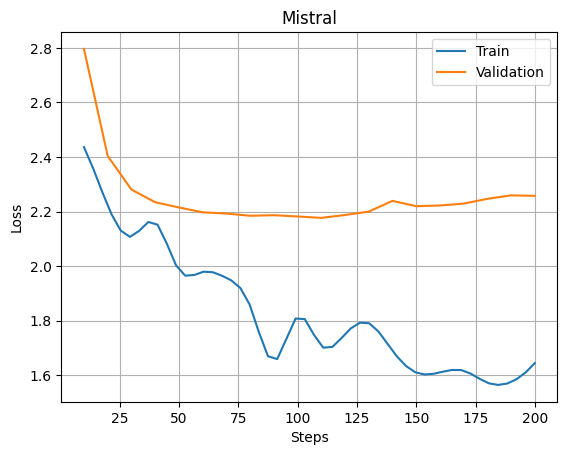

In [11]:
import csv
import matplotlib.pyplot as plt
from scipy import interpolate
import numpy as np

def plot_loss_vs_steps(step_loss_file, model):
    steps_loss = []
    loss_values = []
    eval_loss_values = []

    # Read data from the first file
    with open(step_loss_file, 'r') as file1:
        reader1 = csv.reader(file1)
        next(reader1)  # Skip header
        for row in reader1:
            steps_loss.append(float(row[0]))  # Assuming step is the first column
            loss_values.append(float(row[1]))  # Assuming loss is the second column
            eval_loss_values.append(float(row[2]))

    x_new = np.linspace(10, 200, 50)
    bspline = interpolate.make_interp_spline(steps_loss, loss_values)
    y_new = bspline(x_new)


    plt.plot(x_new, y_new, label='Train')
    plt.plot(steps_loss, eval_loss_values, label='Validation')
    plt.xlabel('Steps')
    plt.ylabel('Loss')
    plt.title(f'{model}')
    plt.legend()
    plt.grid(True)
    plt.savefig(f'{model}_loss_plot.png', dpi=600)

    plt.show()

model_name = ["Llama", "Falcon", "Gemma", "Mistral"]
for i,model in enumerate(models):
  step_loss_file = f'{model}_data.csv'  # Replace with your file containing step and loss data

  plot_loss_vs_steps(step_loss_file, model_name[i])


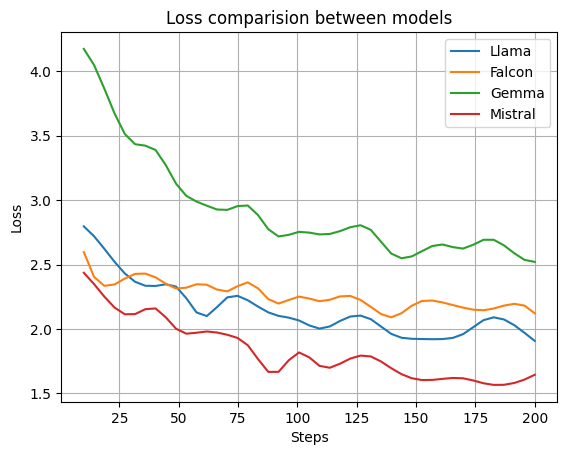

In [10]:
import csv
import matplotlib.pyplot as plt
from scipy import interpolate
import numpy as np

def plot_loss_vs_steps(models, model_name):
    for i, model in enumerate(models):
      step_loss_file = f'{model}_data.csv'
      steps_loss = []
      loss_values = []
      eval_loss_values = []

      # Read data from the first file
      with open(step_loss_file, 'r') as file1:
          reader1 = csv.reader(file1)
          next(reader1)  # Skip header
          for row in reader1:
              steps_loss.append(float(row[0]))  # Assuming step is the first column
              loss_values.append(float(row[1]))  # Assuming loss is the second column
              eval_loss_values.append(float(row[2]))

      x_new = np.linspace(10, 200, 45)
      bspline = interpolate.make_interp_spline(steps_loss, loss_values)
      y_new = bspline(x_new)


      plt.plot(x_new, y_new, label=f'{model_name[i]}')

    plt.xlabel('Steps')
    plt.ylabel('Loss')
    plt.title('Loss comparision between models')
    plt.legend()
    plt.grid(True)
    plt.savefig(f'training_loss_plot.png', dpi=600)

    plt.show()

model_name = ["Llama", "Falcon", "Gemma", "Mistral"]

plot_loss_vs_steps(models, model_name)

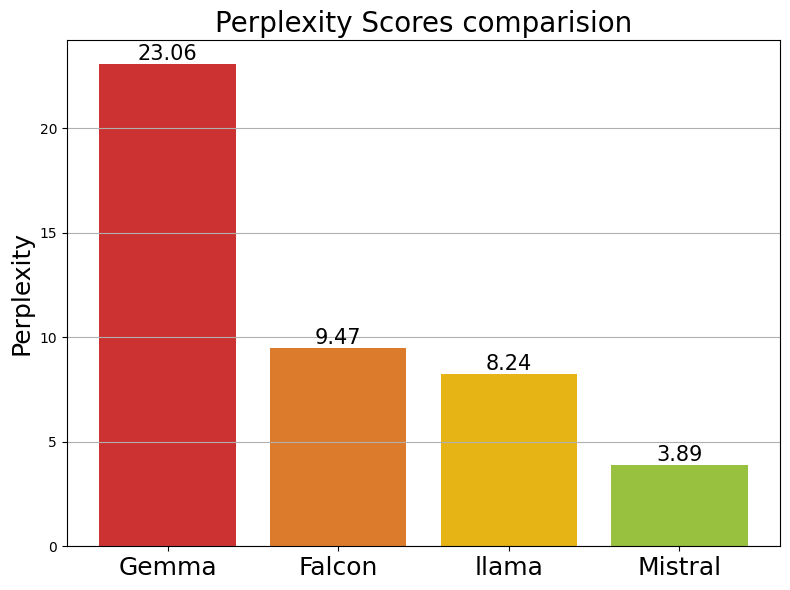

In [33]:
import matplotlib.pyplot as plt

# Data
models = [  'Gemma', 'Falcon','llama','Mistral']
scores = [23.06, 9.47,8.24, 3.89]

# Create bar graph
plt.figure(figsize=(8, 6))
colors = [ '#cc3232', '#db7b2b','#e7b416','#99c140']
bars = plt.bar(models, scores, color=colors)

# Add labels and title
plt.ylabel('Perplexity',fontsize=18)
plt.title('Perplexity Scores comparision',fontsize=20)
plt.xticks(fontsize=18)
plt.grid(axis='y')

# Display scores on top of bars
for bar, score in zip(bars, scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(score), ha='center', va='bottom', fontsize=15)

# Show plot
plt.tight_layout()
plt.savefig('perplexity_scores.png', dpi=600)
plt.show()